In [53]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

In [54]:
#train_d=pd.read_csv("C:/Users/RAJKUMAR/Downloads/data/train_data.csv")
#train_d=pd.read_csv("train_data.csv")
#from sklearn.model_selection import train_test_split
#development_data, validation_data = train_test_split(train_d, test_size=0.15, random_state=25, stratify=train_d['Stay'])
#validation_data=pd.read_csv("/home/subhabrata/Downloads/validation_data.csv")
validation_data=pd.read_csv("Validation_data.csv")
development_data=pd.read_csv("Development_data.csv")
#development_data=pd.read_csv("/home/subhabrata/Downloads/Development_data.csv")

In [55]:
development_data=development_data.drop(['Unnamed: 0'], axis=1)
validation_data=validation_data.drop(['Unnamed: 0'], axis=1)
development_data=development_data.dropna()
validation_data=validation_data.dropna()




In [56]:
map_age={'a':0, 'b':1, 'c':2, 'd':3, 'e':4, 'f':5, 'g':6}
validation_data["Hospital_type_code"]=validation_data["Hospital_type_code"].map(map_age)

development_data["Hospital_type_code"]=development_data["Hospital_type_code"].map(map_age)


In [57]:
map_age={'0-10':0, '11-20':1, '21-30':2, '31-40':3, '41-50':4, '51-60':5, '61-70':6, '71-80':7, '81-90':8, '91-100':9}
validation_data["Age"]=validation_data["Age"].map(map_age)

development_data["Age"]=development_data["Age"].map(map_age)


In [58]:
map_age={'X':0, 'Y':1, 'Z':2}
validation_data["Hospital_region_code"]=validation_data["Hospital_region_code"].map(map_age)

development_data["Hospital_region_code"]=development_data["Hospital_region_code"].map(map_age)


In [59]:
map_wa={'surgery':1, 'TB & Chest disease':2, 'radiotherapy':3,'anesthesia':4,'gynecology':5}
validation_data["Department"]=validation_data["Department"].map(map_wa)

development_data["Department"]=development_data["Department"].map(map_wa)


In [60]:
map_a={'Emergency':3, 'Trauma':1, 'Urgent':2}
validation_data["Type of Admission"]=validation_data["Type of Admission"].map(map_a)

development_data["Type of Admission"]=development_data["Type of Admission"].map(map_a)


In [61]:
map_w={'A':1, 'B':2, 'C':3,'D':4,'E':5,'F':6}
validation_data["Ward_Facility_Code"]=validation_data["Ward_Facility_Code"].map(map_w)

development_data["Ward_Facility_Code"]=development_data["Ward_Facility_Code"].map(map_w)


In [62]:
map_wa={'P':1, 'Q':2, 'R':3,'S':4,'T':5,'U':6}
validation_data["Ward_Type"]=validation_data["Ward_Type"].map(map_wa)

development_data["Ward_Type"]=development_data["Ward_Type"].map(map_wa)


In [63]:
map_illness={"Minor":0, "Moderate":1, "Extreme":2}
validation_data["Severity of Illness"]=validation_data["Severity of Illness"].map(map_illness)

development_data["Severity of Illness"]=development_data["Severity of Illness"].map(map_illness)


In [64]:
X_test=validation_data.drop(["case_id","patientid","Stay", ], axis=1)
y_test=validation_data["Stay"]
X_train=development_data.drop(["case_id","patientid","Stay"], axis=1)
y_train=development_data["Stay"]

In [65]:
from catboost import CatBoostClassifier, Pool

Learning rate set to 0.5
0:	learn: 0.4131777	total: 33.5ms	remaining: 1.64s
1:	learn: 0.3145592	total: 66.2ms	remaining: 1.59s
2:	learn: 0.2707890	total: 101ms	remaining: 1.57s
3:	learn: 0.2480557	total: 135ms	remaining: 1.55s
4:	learn: 0.2364906	total: 170ms	remaining: 1.53s
5:	learn: 0.2322498	total: 221ms	remaining: 1.62s
6:	learn: 0.2273803	total: 265ms	remaining: 1.63s
7:	learn: 0.2252020	total: 318ms	remaining: 1.67s
8:	learn: 0.2225749	total: 369ms	remaining: 1.68s
9:	learn: 0.2215620	total: 432ms	remaining: 1.73s
10:	learn: 0.2202706	total: 480ms	remaining: 1.7s
11:	learn: 0.2192500	total: 620ms	remaining: 1.96s
12:	learn: 0.2183580	total: 672ms	remaining: 1.91s
13:	learn: 0.2175554	total: 736ms	remaining: 1.89s
14:	learn: 0.2171053	total: 809ms	remaining: 1.89s
15:	learn: 0.2169189	total: 846ms	remaining: 1.8s
16:	learn: 0.2166358	total: 885ms	remaining: 1.72s
17:	learn: 0.2161929	total: 924ms	remaining: 1.64s
18:	learn: 0.2160374	total: 965ms	remaining: 1.57s
19:	learn: 0.215

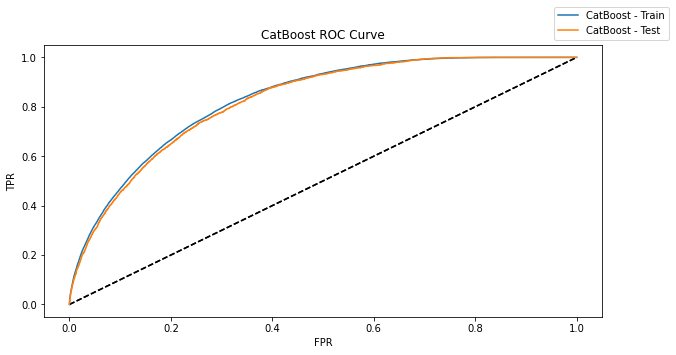

In [66]:
cat = CatBoostClassifier(iterations=50)

cat.fit(X_train, y_train)

y_test_pred = cat.predict(X_test)
y_train_pred = cat.predict(X_train)

print("========================== CatBoost - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(cat.score(X_train, y_train)))
print("Test Accuracy: %0.3f"%(cat.score(X_test, y_test)))
print("=====================================================")
# Cross validation
from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_cat = cross_val_score(cat, X_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_cat)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_cat[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_cat)))
print("=====================================================")

# Performance Metrices
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = cat.predict_proba(X_test)[:,1]
y_train_pred_prob = cat.predict_proba(X_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('CatBoost ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='CatBoost - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='CatBoost - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

In [67]:
# Save the best combination of parameters as best model
import pickle
pickle.dump(cat, open('cat.pkl', 'wb'))


In [68]:
model_cat=pickle.load(open('cat.pkl','rb'))